epoch,train_loss,valid_loss,error_rate,time
0,0.197053,0.040987,0.013532,02:40


epoch,train_loss,valid_loss,error_rate,time
0,0.077430,0.077817,0.019621,03:31
1,0.035581,0.024309,0.011502,03:40
2,0.021826,0.032187,0.014885,03:40


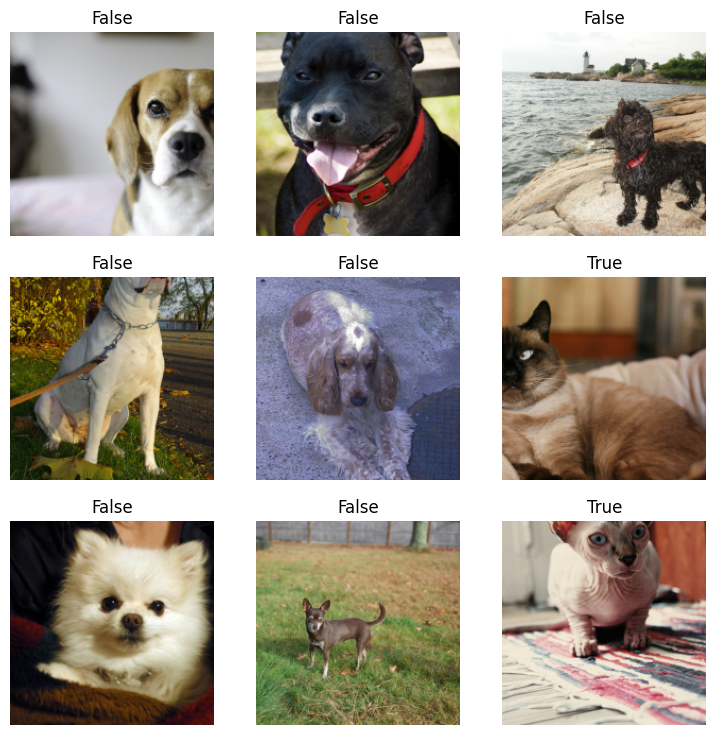

In [1]:
from fastai.vision.all import *

def is_cat(x): return x[0].isupper() 


path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

dls.show_batch()

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)


learn.export('model.pkl')